In [9]:
import autogen
from autogen import ConversableAgent, UserProxyAgent

In [5]:
config_list=[
{
"model": "llama3",
"base_url": "http://localhost:11434/v1",
"api_key": "ollama", # just a placeholder
}
]

llm_config = config_list[0]

In [6]:
# create an AssistantAgent instance named "assistant"
assistant = autogen.AssistantAgent(
    name="assistant",
    llm_config=llm_config,
)
# create a UserProxyAgent instance named "user_proxy"
user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    human_input_mode="TERMINATE",
    max_consecutive_auto_reply=10,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
    code_execution_config={
        "work_dir": "web",
        "use_docker": False,
    },  # Please set use_docker=True if docker is available to run the generated code. Using docker is safer than running the generated code directly.
    llm_config=llm_config,
    system_message="""Reply TERMINATE if the task has been solved at full satisfaction.
Otherwise, reply CONTINUE, or the reason why the task is not solved yet.""",
)

In [7]:
user_proxy.initiate_chat(assistant, message="Plot a sine wave function using Python")

user_proxy (to assistant):

Plot a sine wave function using Python

--------------------------------------------------------------------------------
[autogen.oai.client: 07-08 09:45:22] {315} WARNING - Model llama3 is not found. The cost will be 0. In your config_list, add field {"price" : [prompt_price_per_1k, completion_token_price_per_1k]} for customized pricing.
assistant (to user_proxy):

To plot a sine wave function using Python, we can use the popular matplotlib library. Here's an example code block:

```
sh
import numpy as np
import matplotlib.pyplot as plt

# Define the x-axis values
x = np.linspace(0, 4 * np.pi, 1000)

# Calculate the corresponding y-values for the sine wave function
y = np.sin(x)

# Create the plot
plt.plot(x, y)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sine Wave Function')

# Display the plot
plt.show()
```

In this code:

1. We import the necessary libraries: NumPy (np) for numerical computations and matplotlib.pyplot as plt for c

ChatResult(chat_id=None, chat_history=[{'content': 'Plot a sine wave function using Python', 'role': 'assistant'}, {'content': "To plot a sine wave function using Python, we can use the popular matplotlib library. Here's an example code block:\n\n```\nsh\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Define the x-axis values\nx = np.linspace(0, 4 * np.pi, 1000)\n\n# Calculate the corresponding y-values for the sine wave function\ny = np.sin(x)\n\n# Create the plot\nplt.plot(x, y)\n\n# Add labels and title\nplt.xlabel('X')\nplt.ylabel('Y')\nplt.title('Sine Wave Function')\n\n# Display the plot\nplt.show()\n```\n\nIn this code:\n\n1. We import the necessary libraries: NumPy (np) for numerical computations and matplotlib.pyplot as plt for creating plots.\n2. We define the x-axis values using np.linspace, which generates 1000 evenly spaced values from 0 to 4π.\n3. We calculate the corresponding y-values for the sine wave function by applying the np.sin function to each x-value.\

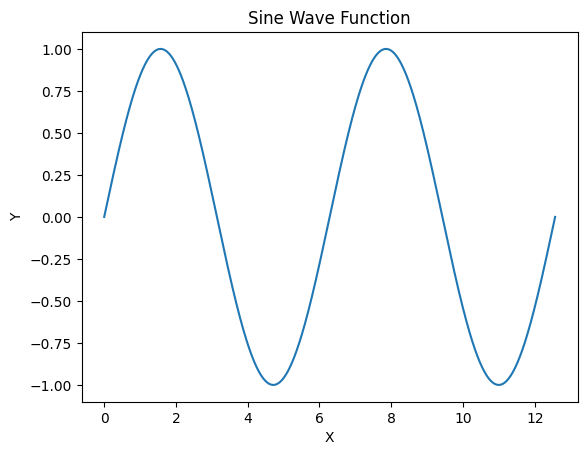

In [8]:
# For the code below, just copy the code generated by the agent and paste it here.

import numpy as np
import matplotlib.pyplot as plt

# Define the x-axis values
x = np.linspace(0, 4 * np.pi, 1000)

# Calculate the corresponding y-values for the sine wave function
y = np.sin(x)

# Create the plot
plt.plot(x, y)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sine Wave Function')

# Display the plot
plt.show()

# References

- https://microsoft.github.io/autogen/blog/2024/06/24/AltModels-Classes/
- https://ollama.com/blog/openai-compatibility